# Spaceship Titanic

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
test =  pd.read_csv("../titanc_spaceship/test.csv")
train = pd.read_csv("../titanc_spaceship/train.csv")

In [3]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


# Exploring Data

In [4]:
len(train)

8693

In [5]:
train.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

## Duplicated Values

In [6]:
train.duplicated().sum()

0

## Missing Values

In [7]:
train.isnull().sum().sort_values(ascending=False)/len(train) *100

CryoSleep       2.496261
ShoppingMall    2.392730
VIP             2.335212
HomePlanet      2.312205
Name            2.300702
Cabin           2.289198
VRDeck          2.162660
FoodCourt       2.105142
Spa             2.105142
Destination     2.093639
RoomService     2.082135
Age             2.059128
PassengerId     0.000000
Transported     0.000000
dtype: float64

# Explore columns

## Home Planet

<AxesSubplot:xlabel='HomePlanet', ylabel='Count'>

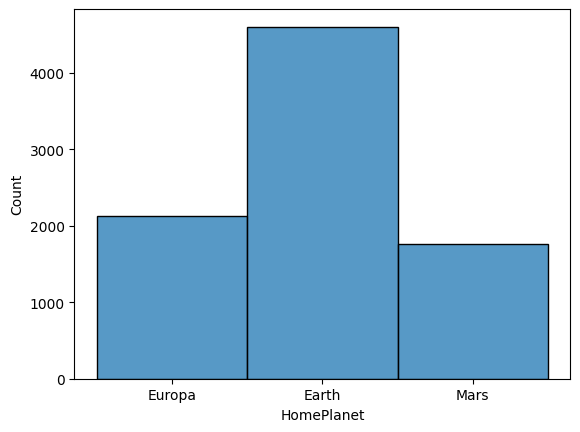

In [8]:
sns.histplot(data=train, x='HomePlanet')

In [9]:
from sklearn import preprocessing

In [10]:
label_encoder = preprocessing.LabelEncoder()

In [11]:
train['HomePlanet'] = label_encoder.fit_transform(train[['HomePlanet']])

/Users/yasmeenmahomedy2/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Cryosleep

In [12]:
dictionary = {False :0 , True :1}
train['CryoSleep'] = train.CryoSleep.map(dictionary)

In [13]:
train.tail()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8688,9276_01,1,0.0,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,0,1.0,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,0,0.0,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,1,0.0,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False
8692,9280_02,1,0.0,E/608/S,TRAPPIST-1e,44.0,False,126.0,4688.0,0.0,0.0,12.0,Propsh Hontichre,True


<AxesSubplot:>

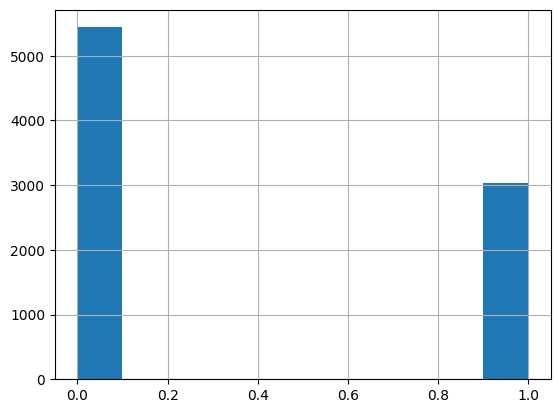

In [14]:
train['CryoSleep'].hist()

## Cabin ***

In [15]:
train['Cabin'].value_counts()

G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: Cabin, Length: 6560, dtype: int64

In [16]:
train.Cabin[0].split('/')

['B', '0', 'P']

## Destination

In [17]:
train['Destination'].value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [18]:
label_encoder2 = preprocessing.LabelEncoder()
train['Destination'] = label_encoder2.fit_transform(train[['Destination']])

/Users/yasmeenmahomedy2/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<AxesSubplot:>

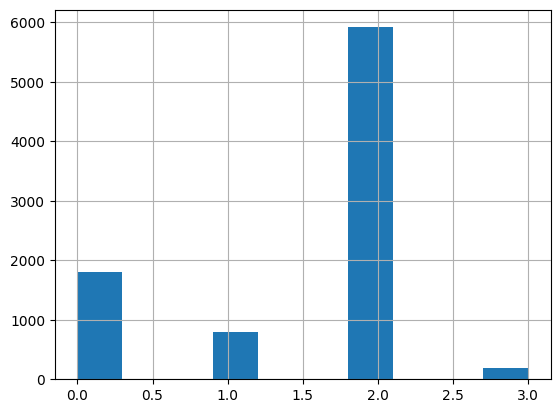

In [19]:
train['Destination'].hist()

## Age

<AxesSubplot:xlabel='Age', ylabel='Count'>

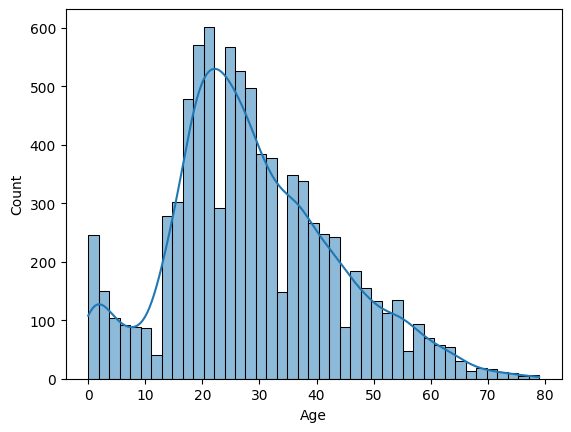

In [20]:
sns.histplot(data=train, x='Age', kde=True)

In [21]:
train['Age'].mean()

28.82793046746535

## VIP

In [22]:
train['VIP'].value_counts()

False    8291
True      199
Name: VIP, dtype: int64

In [23]:
dictionary = {False :0 , True :1}
train['VIP'] = train.VIP.map(dictionary)


In [24]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,1,0.0,B/0/P,2,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,0,0.0,F/0/S,2,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,1,0.0,A/0/S,2,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,1,0.0,A/0/S,2,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,0,0.0,F/1/S,2,16.0,0.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


<AxesSubplot:>

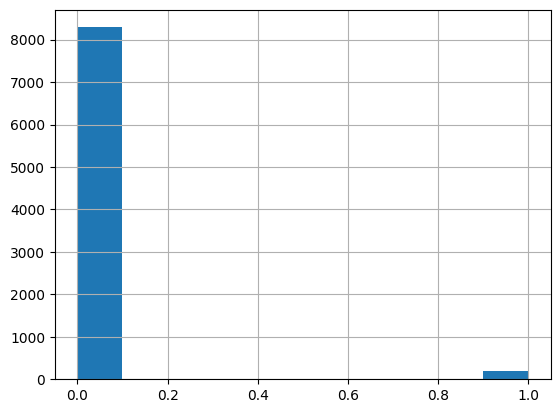

In [25]:
train['VIP'].hist()

In [26]:
percent_vip = (train['VIP']==1).sum() / train['VIP'].sum()

In [27]:
percent_vip

1.0

## RoomService,	FoodCourt,	ShoppingMall,Spa, VRDec

(array([8.252e+03, 1.360e+02, 6.000e+01, 2.600e+01, 1.800e+01, 7.000e+00,
        2.000e+00, 2.000e+00, 1.000e+00, 1.000e+00]),
 array([    0. ,  2413.3,  4826.6,  7239.9,  9653.2, 12066.5, 14479.8,
        16893.1, 19306.4, 21719.7, 24133. ]),
 <BarContainer object of 10 artists>)

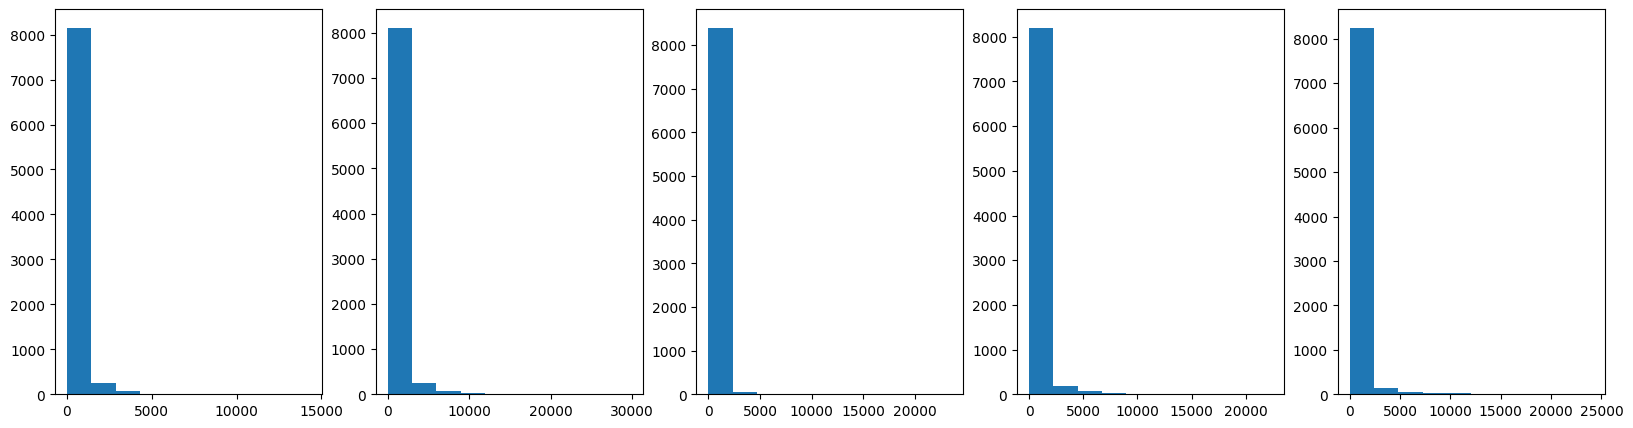

In [28]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(20,5))

ax1.hist(train['RoomService'])
ax2.hist(train['FoodCourt'])
ax3.hist(train['ShoppingMall'])
ax4.hist(train['Spa'])
ax5.hist(train['VRDeck'])

## Transported

In [29]:
#convert to binary
train['Transported'] = train.Transported.map(dictionary)


In [36]:
train.duplicated().sum()

0